## Clustering

In [27]:
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA, NMF

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import numpy as np
import re

N_DATASET=2
COLAB = 1 # COLAB =1 si usamos colab
LANG = 1 # Si tenemos en cuenta el idioma
REG = 1 # Si tenemos en cuenta la religion
DATASETS = ["homosexualf_preprocesado.csv", "homosexualh_preprocesado.csv", "heterosexual_preprocesado.csv"]


lang = ['afrikaans', 'albanian', 'arabic', 'armenian', 'basque', 'belarusan', 'bengali', 'breton', 'bulgarian', 'tech', 'catalan', 'cebuano', 'chechen']
lang.append(['chinese','croatian','czech','danish','dutch','english', 'esperanto','estonian', 'farsi', 'finnish', 'french', 'frisian', 'georgian', 'german', 'greek']) 
lang.append(['gujarati','hawaiian','hebrew','hindi','hungarian', 'icelandic', 'ilongo','indonesian','irish', 'italian', 'japanese', 'khmer','korean','latvian', 'lithuanian']) 
lang.append(['malay', 'maori', 'mongolian', 'norwegian', 'occitan',  'persian','polish', 'portuguese', 'romanian',  'rotuman', 'russian', 'sanskrit', 'sardinian'])
lang.append(['serbian',  'sign language',  'slovak', 'slovenian', 'spanish',  'swahili', 'swedish', 'tagalog',  'tamil', 'thai', 'tibetan', 'turkish', 'ukrainian', 'urdu', 'vietnamese',  'welsh', 'yiddish'])




In [28]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    path_actual = "/content/drive/My Drive/NoSupervisado/"
    dataset = path_actual + DATASETS[N_DATASET]
    print("Dataset path: ", dataset)

else:
    path_actual =     os.getcwd()
    print("Path actual: ",path_actual)
    dataset = path_actual + "/dataset/"+ DATASETS[N_DATASET]
    print("Dataset path: ", dataset)

Mounted at /content/drive
Dataset path:  /content/drive/My Drive/NoSupervisado/heterosexual_preprocesado.csv


In [29]:
df = pd.read_csv(dataset, index_col = 0)

if LANG == 0:
   for language in lang:
     if lang in df.columns.to_list():
        df.drop(columns =[lang], inplace=True)

df

,age,status,drinks,drugs,height,smokes,longitude,latitude,number_of_languages,hawaiian,croatian,spanish,indonesian,rotuman,yiddish,czech,dutch,frisian,urdu,thai,gujarati,german,arabic,irish,finnish,ilongo,khmer,tech,albanian,basque,hungarian,danish,french,swahili,esperanto,occitan,english,farsi,greek,italian,...,norwegian,maori,portuguese,serbian,estonian,georgian,cebuano,bengali,belarusan,slovenian,afrikaans,swedish,tibetan,korean,cat,dog,hinduism,atheism,christianity,agnosticism,catholicism,buddhism,islam,judaism,diet_anything,diet_halal,diet_vegan,diet_vegetarian,job_agnosticism,job_art,job_health,job_industry,job_retired,job_social,job_student,job_tech,essays_Book,essays_Movie,essays_Music,essays_Social
0,-1.118895,-0.157919,-0.119448,-0.383835,1.679597,2.343478,-0.074270,-0.309158,-0.837919,-0.034027,-0.029597,-0.52791,-0.041755,-0.013796,-0.052855,-0.040236,-0.056367,-0.013264,-0.044149,-0.05458,-0.02181,-0.20249,-0.087375,-0.040842,-0.025111,-0.018097,-0.02711,-0.16459,-0.015177,-0.020243,-0.032265,-0.037161,-0.338571,-0.046726,-0.03869,-0.018802,-0.926283,-0.066123,-0.052194,-0.172675,...,-0.035191,-0.017163,-0.119372,-0.02968,-0.014742,-0.013201,-0.022348,-0.033888,-0.01623,-0.01053,-0.033694,-0.059657,-0.016425,-0.087277,-0.367932,0.089466,-0.078722,-0.304242,-0.279131,6.562951,-0.253881,-0.152049,-0.039787,-0.218976,0.339144,-0.033009,-0.110770,-0.314379,-0.813470,-0.356704,-0.259039,6.567503,-0.064407,-0.424689,-0.282769,-0.456403,-0.422089,-0.327230,1.317659,-0.793875
1,0.473544,-0.157919,-0.119448,-0.383835,0.927207,-0.426716,-0.074270,-0.309158,2.992120,-0.034027,-0.029597,1.39789,17.182361,-0.013796,-0.052855,-0.040236,-0.056367,-0.013264,-0.044149,-0.05458,-0.02181,-0.20249,-0.087375,-0.040842,-0.025111,-0.018097,-0.02711,-0.16459,-0.015177,-0.020243,-0.032265,-0.037161,-0.338571,-0.046726,-0.03869,-0.018802,1.045025,-0.066123,-0.052194,-0.172675,...,-0.035191,-0.017163,-0.119372,-0.02968,-0.014742,-0.013201,-0.022348,-0.033888,-0.01623,-0.01053,-0.033694,-0.059657,-0.016425,-0.087277,-0.367932,0.089466,-0.078722,-0.304242,-0.279131,-0.352594,4.760362,-0.152049,-0.039787,-0.218976,0.339144,-0.033009,-0.110770,-0.314379,-0.813470,2.803445,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,-0.422089,-0.327230,1.317659,-0.793875
2,-1.118895,-0.157919,-2.755182,-0.383835,0.927207,-0.426716,-0.074270,-0.309158,0.119591,-0.034027,-0.029597,-0.52791,-0.041755,-0.013796,-0.052855,-0.040236,-0.056367,-0.013264,-0.044149,-0.05458,-0.02181,-0.20249,18.143088,-0.040842,-0.025111,-0.018097,-0.02711,-0.16459,-0.015177,-0.020243,-0.032265,-0.037161,-0.338571,-0.046726,-0.03869,-0.018802,-0.926283,-0.066123,-0.052194,-0.172675,...,-0.035191,-0.017163,-0.119372,-0.02968,-0.014742,-0.013201,-0.022348,-0.033888,-0.01623,-0.01053,-0.033694,-0.059657,-0.016425,-0.087277,-0.367932,0.089466,-0.078722,-0.304242,-0.279131,-0.352594,-0.253881,-0.152049,-0.039787,-0.218976,0.339144,-0.033009,-0.110770,-0.314379,-0.813470,-0.356704,-0.259039,-0.152265,-0.064407,-0.424689,3.536455,-0.456403,-0.422089,-0.327230,-0.758922,1.259644
3,-0.269594,-0.157919,-0.119448,-0.383835,1.428800,-0.426716,-0.074270,-0.309158,-0.837919,-0.034027,-0.029597,-0.52791,-0.041755,-0.013796,-0.052855,-0.040236,-0.056367,-0.013264,-0.044149,-0.05458,-0.02181,-0.20249,-0.087375,-0.040842,-0.025111,-0.018097,-0.02711,-0.16459,-0.015177,-0.020243,-0.032265,-0.037161,-0.338571,-0.046726,-0.03869,-0.018802,-0.926283,-0.066123,-0.052194,-0.172675,...,-0.035191,-0.017163,-0.119372,-0.02968,-0.014742,-0.013201,-0.022348,-0.033888,-0.01623,-0.01053,-0.033694,-0.059657,-0.016425,-0.087277,-0.367932,0.089466,7.280945,-0.304242,-0.279131,-0.352594,-0.253881,-0.152049,-0.039787,-0.218976,0.339144,-0.033009,-0.110770,-0.314379,1.229301,-0.356704,-0.259039,-0.152265,-0.064407,-0.424689,-0.282769,-0.456403,-0.422089,-0.327230,-0.758922,1.259644
4,0.579707,-0.157919,-0.119448,-0.383835,0.676410,2.343478,-0.074270,-0.309158,1.077101,-0.034027,-0.029597,-0.52791,-0.041755,-

0.847440135745861


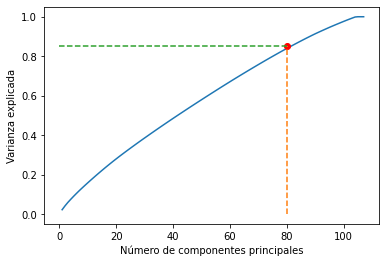

In [30]:
if (len(X) < 39):
  X = df
  pca = PCA(X.shape[1]-1).fit(X)
  plt.figure(figsize=(6,4))

  xx = np.arange(1, X.shape[1], step=1)
  yy = np.cumsum(pca.explained_variance_ratio_)
  print(yy[25])


  plt.plot(xx, yy)
  plt.plot(25,0.87, 'ro')
  plt.plot([25,25],[0.0,0.87], linestyle='--')
  plt.plot([0,25],[.87,0.87], linestyle='--')

  plt.xlabel('Número de componentes principales')
  plt.ylabel('Varianza explicada')

  X = PCA(24).fit_transform(X)

else:
  X = df
  pca = PCA(X.shape[1]-1).fit(X)
  plt.figure(figsize=(6,4))

  xx = np.arange(1, X.shape[1], step=1)
  yy = np.cumsum(pca.explained_variance_ratio_)
  print(yy[80])


  plt.plot(xx, yy)
  plt.plot(80,0.85, 'ro')
  plt.plot([80,80],[0.0,0.85], linestyle='--')
  plt.plot([0,80],[.85,0.85], linestyle='--')

  plt.xlabel('Número de componentes principales')
  plt.ylabel('Varianza explicada')

  X = PCA(80).fit_transform(X)  

In [31]:
X

array([[-0.97914196, -0.8138303 ,  3.23353022, ...,  0.53190307,
         1.13896573,  0.11683682],
       [ 2.8351689 ,  2.91263846, -1.05702383, ..., -0.05881923,
         4.4671342 , -0.40512299],
       [ 0.53247249,  1.2787499 , -1.13870468, ...,  0.20249112,
        -0.42576123, -3.63927277],
       ...,
       [-0.01981165, -1.21787922,  3.51687432, ...,  0.53159002,
         0.74787575, -3.53400118],
       [ 1.75422493,  0.77531643,  0.25409472, ...,  0.05069407,
        -0.46925232, -2.94615148],
       [ 0.67885471, -3.41398566, -3.18656794, ...,  0.19351373,
        -0.20074937, -0.07051044]])

## KMEANS

Cluster 2
For n_clusters = 2 The average silhouette_score is : 0.19557251452887986


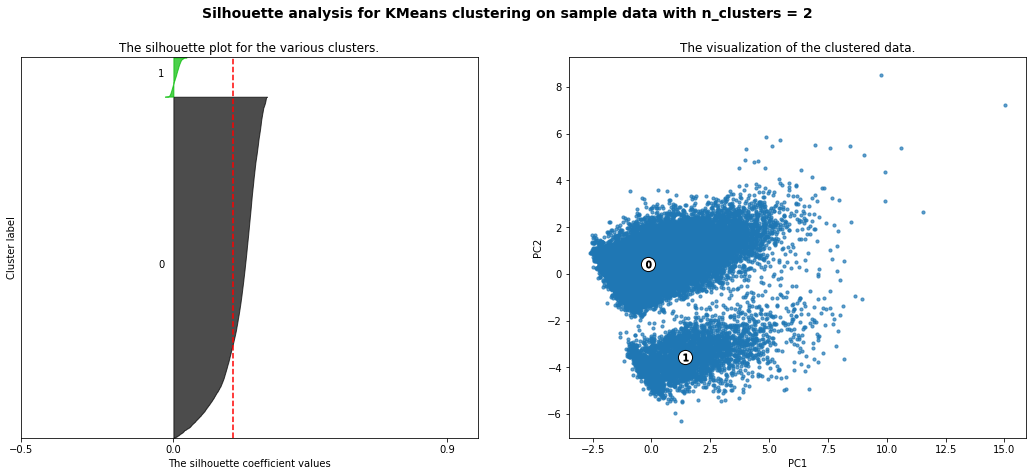

Cluster 3
For n_clusters = 3 The average silhouette_score is : 0.11129459651792321


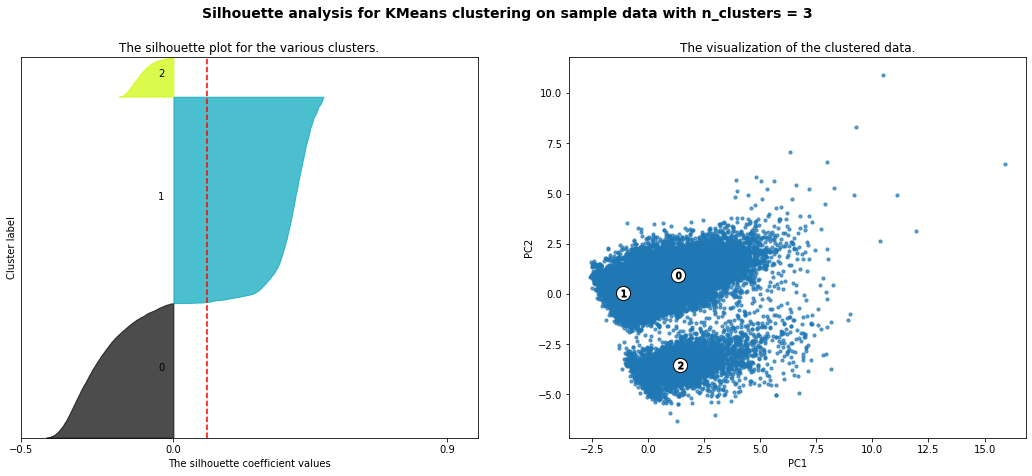

Cluster 4
For n_clusters = 4 The average silhouette_score is : 0.10470746725552503


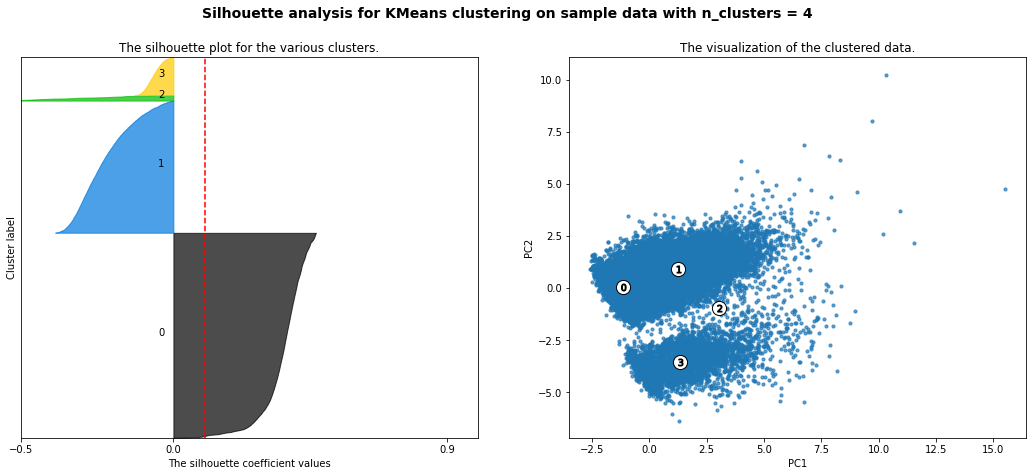

In [32]:
for n_clusters in range(2,5):
    print("Cluster", n_clusters)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer =  KMeans(n_clusters=n_clusters, n_init=100, random_state=4533)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X)
    ax2.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, 0, 0.9])

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')


    plt.show()

## DBSCAN(eps, min_samples=100)

In [33]:
X = X[:int(len(X)*0.5)]

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=10, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
if n_clusters_>1:
  print("Silhouette Coefficient: %0.3f"  % silhouette_score(X, db.labels_))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
## Arbol

clustering = AgglomerativeClustering().fit(X)

for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = clustering = AgglomerativeClustering(n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.83, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

In [ ]:
for n_clusters in range(2,5):
    print("Cluster", n_clusters)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer =  AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X)
    ax2.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, 0, 0.9])

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")

    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')


    plt.show()